

URL Dashboard : https://public.tableau.com/app/profile/nurul.aryati/viz/P0M1_nurul/Dashboard1?publish=yes

## Problem Identification

Analyzing world university rankings data for the year 2023 by understanding the distribution of characteristics of each university. The goal of this analysis is intended for various parties, from global ranking organizations to the general public, depending on the intended utilization of the generated analysis results.

## Elaboration of Problems using 5W1H

1. **What:** How is the distribution of university rankings across all universities?
2. **Why:** Is there a very strong correlation between the overall university scores and their rankings?
3. **Why:** Is research performance influenced by teaching methods?
4. **How Many:** What is the staff-to-student ratio in many universities?
5. **Why:** Is the citation score influenced by research performance?
6. **How:** What is the distribution pattern between male and female students in many universities?
7. **Where:** In which countries are there a significant number of international students?
8. **What:** What metrics most significantly influence the overall assessment of university rankings?

## Data Loading

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("World University Rankings 2023.csv")

In [ ]:
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3


In [ ]:
print(df.shape)
print('Banyak baris yang tersedia', df.shape[0], 'baris.')
print('Banyak kolom yang tersdia', df.shape[1], 'kolom.')

(2341, 13)
Banyak baris yang tersedia 2341 baris.
Banyak kolom yang tersdia 13 kolom.


## Data Cleaning

Converting data categories into numerical and replacing data with NaN if the data type cannot be changed.

In [ ]:
df["No of student"] = pd.to_numeric(df["No of student"].str.replace(',', ''), errors="coerce")

Changing the format in the 'International Student' category table by removing the '%' symbol and converting its data type to numerical.

In [ ]:
df["International Student"] = pd.to_numeric(df["International Student"].str.replace("%", ''), errors="coerce")

Creating a function for changing the formatting of the female-to-male ratio column.

In [ ]:
def get_female_percentage(ratio):
    try:
        x, y = map(int, ratio.split(" : "))
        return round(x / (x + y), 2)
    except (ValueError, ZeroDivisionError):
        return ratio


In [ ]:
def get_male_percentage(ratio):
    try:
        x, y = map(int, ratio.split(" : "))
        return round(x / (x + y), 2)
    except (ValueError, ZeroDivisionError):
        return ratio


Applying the above function to obtain a new column in the form of the Male Percentage and Female Percentage columns.

In [ ]:
df.dtypes

University Rank                 object
Name of University              object
Location                        object
No of student                  float64
No of student per staff        float64
International Student          float64
Female:Male Ratio               object
OverAll Score                   object
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
dtype: object

In [ ]:

df["Female:Male Ratio"] = df["Female:Male Ratio"].astype(str)

df["Female Percentage"] = df["Female:Male Ratio"].apply(get_female_percentage)

In [ ]:

df["Male Percentage"] = df["Female:Male Ratio"].apply(get_male_percentage)

Changing the format of the 'overall_score' column to be uniform and converting its data type.

Creating a `get_score` function by removing symbols ('-') and obtaining the average value from a given score.

In [ ]:
def get_score(value):
    values = [float(val) for val in str(value).split('–')]
    return values[0] if len(values) == 1 else sum(values) / len(values)


In [ ]:
df["OverAll Score"] = pd.to_numeric(df["OverAll Score"].apply(get_score), errors="coerce")

Creating a `get_rank` function by removing symbols ('-') and obtaining the average value from a given rank.

In [ ]:
def get_rank(value):
    non_numeric_mapping = {
        '1501+': 1501,
        '1001': 1001,
        'Not ranked': None,
        'Reporter': None,
    }

    try:
        values = [float(val) for val in str(value).split('–')]
        return values[0] if len(values) == 1 else sum(values) / len(values)
    except ValueError:
        return non_numeric_mapping.get(value, None)



In [ ]:
df["University Rank"] = pd.to_numeric(df["University Rank"].apply(get_rank), errors="coerce")

Deleting the column ('Female:Male Ratio') and replacing it with the columns 'Female Percentage' and 'Male Percentage'.

In [ ]:
df = df.drop("Female:Male Ratio", axis=1)

Checking whether the data types for each column are consistent with the intended data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              1697 non-null   float64
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   float64
 4   No of student per staff      2208 non-null   float64
 5   International Student        2206 non-null   float64
 6   OverAll Score                1799 non-null   float64
 7   Teaching Score               1799 non-null   float64
 8   Research Score               1799 non-null   float64
 9   Citations Score              1799 non-null   float64
 10  Industry Income Score        1799 non-null   float64
 11  International Outlook Score  1799 non-null   float64
 12  Female Percentage            2341 non-null   object 
 13  Male Percentage   

Saving the cleaned data.

In [ ]:
df.to_csv('world_university_rank.csv', index=False)

In [ ]:
df = pd.read_csv('world_university_rank.csv')

## Analysis and Calculation

### Histogram of University Rankings Distribution (2023)

Insight: This histogram illustrates the distribution of university rankings in 2023. It allows us to observe how many universities occupy specific ranks, revealing potential concentrations of universities within certain ranking ranges.

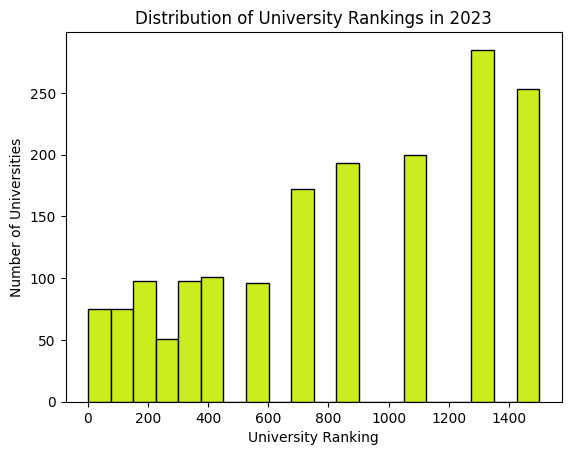

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['University Rank'], bins=20, edgecolor='#000000', color='#cced1d')
plt.xlabel('University Ranking')
plt.ylabel('Number of Universities')
plt.title('Distribution of University Rankings in 2023')
plt.show()


From the above histogram results, it can be observed that only around 60 universities are ranked within the top 100 globally, while the remaining 250 universities or more are positioned beyond rank 1200.

### Scatter Plot of University Ranking vs. Overall Score

A scatter plot illustrates the relationship between university ranking and overall scores, identifying patterns and trends, and indicating whether there are any outlier values between the two variables.

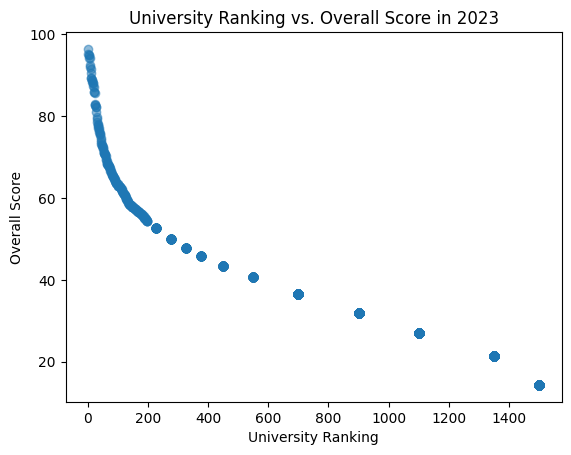

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['University Rank'], df['OverAll Score'], alpha=0.5)
plt.xlabel('University Ranking')
plt.ylabel('Overall Score')
plt.title('University Ranking vs. Overall Score in 2023')
plt.show()


From the results above, it indicates that the higher the overall score, the higher the university ranking, and there are no outlier values occurring between these two variables.

### Scatter Plot of Teaching Score vs. Research Score

The scatter plot aids in visualizing the relationship between teaching scores and research scores of each university, revealing patterns or correlations. It also helps identify any concentration or correlation of universities based on their performance in these two areas.

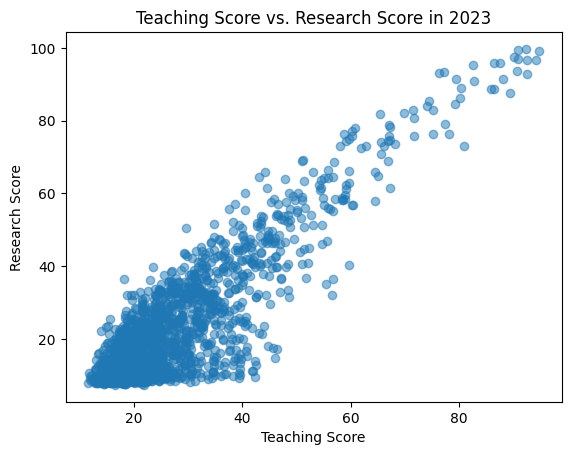

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Teaching Score'], df['Research Score'], alpha=0.5)
plt.xlabel('Teaching Score')
plt.ylabel('Research Score')
plt.title('Teaching Score vs. Research Score in 2023')
plt.show()


From the visualization results above, it can be observed that there are still many universities with performance that is not particularly strong in both research and teaching. This is evident from the visualization where a significant number of plots are concentrated towards the lower left, approaching the origin (0,0).

### Histogram Plot of Student-to-Staff Ratio by Location

Examining the distribution of universities based on specific ratios regarding class size and teacher resources.

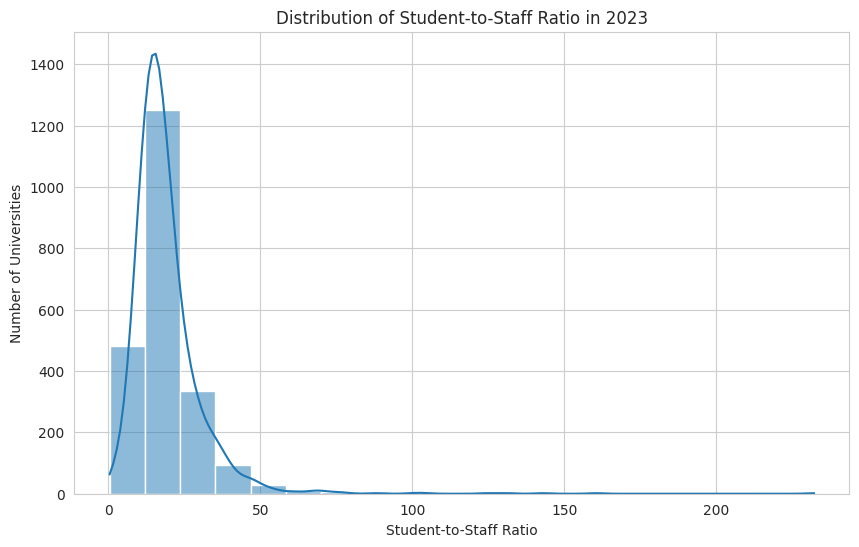

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['No of student per staff'], bins=20, kde=True)
plt.xlabel('Student-to-Staff Ratio')
plt.ylabel('Number of Universities')
plt.title('Distribution of Student-to-Staff Ratio in 2023')
plt.show()



From the plot above, it is evident that among the 1400 universities, 10 students are handled by 1 staff or teacher, indicating sufficient availability of staff.

### Scatter Plot between Female Percentage and Male Percentage

The plot represented by the orange dots illustrates the representation of male and female percentages for each university.

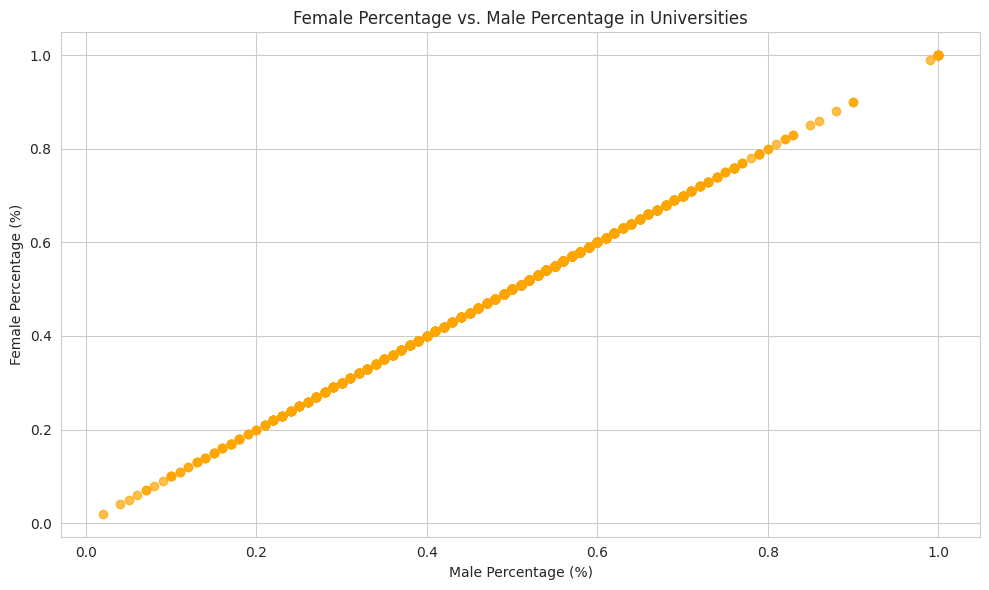

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

male_percentages = df['Male Percentage']
female_percentages = df['Female Percentage']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(male_percentages, female_percentages, alpha=0.7, color='orange')

# Add labels and title
plt.xlabel('Male Percentage (%)')
plt.ylabel('Female Percentage (%)')
plt.title('Female Percentage vs. Male Percentage in Universities')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



The scatter plot, forming a 45-degree angle, indicates a balanced distribution between the number of males and females. The presence of some missing points suggests that there are a few universities that could not represent points, albeit in a small number.

### Scatter Plot of Research Score vs. Citations Score

This is done to observe the concentration of data, determining where many universities lie, and comparing whether there is a correlation between these two metrics.

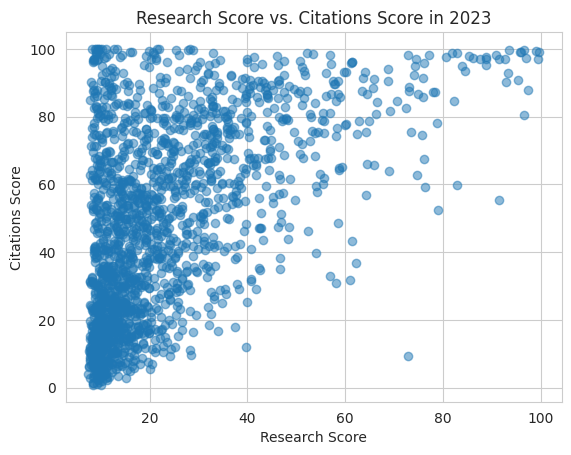

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Research Score'], df['Citations Score'], alpha=0.5)
plt.xlabel('Research Score')
plt.ylabel('Citations Score')
plt.title('Research Score vs. Citations Score in 2023')
plt.show()


Many universities have low values for both citations and research, as indicated by the scatter plot leaning towards the origin. There seems to be no correlation where higher citation scores correspond to higher research scores. From the plot, it is evident that many universities have high citation scores, but their research scores do not exceed 10 points. The concentration of data is around x-axis = 5 and y-axis = 100.

### Heatmap of Correlations between University Metrics

A heatmap visualizes the relationship between correlation metrics with different variables such as overall score, teacher score, research score, and citation score. Each cell in the heatmap displays the correlation coefficient between two variables, and the color scale indicates the strength and direction of the relationship between the two variables.

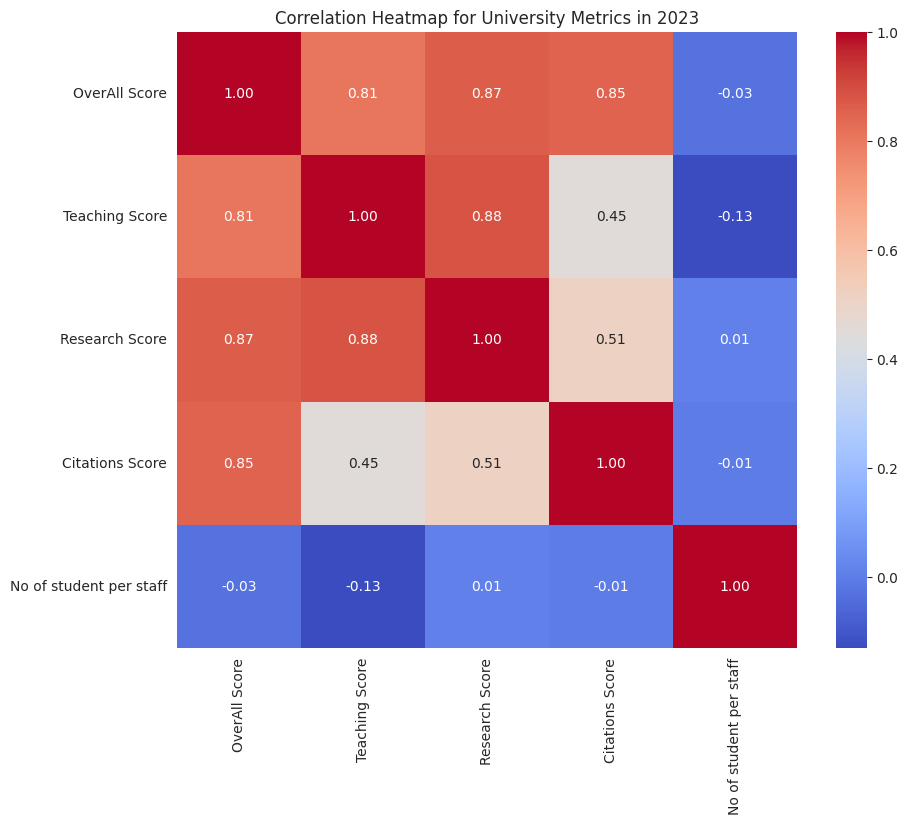

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['OverAll Score', 'Teaching Score', 'Research Score', 'Citations Score', 'No of student per staff']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for University Metrics in 2023')
plt.show()


From the results above, it can be observed that the warmer the color, the stronger the correlation between the variables, and conversely, the colder the color, the weaker the correlation between the variables. The heatmap results indicate that teaching score, research score, and citations score contribute significantly to the overall score evaluation. Furthermore, research score and teaching score have a strong influence on each other.

### Descriptive Statistics



The selection of descriptive statistics, such as the calculations below, aims to summarize and understand the characteristics of the selected data. In this case, the data of Overall Score is chosen to represent the entirety of the available data.

In [ ]:
df['OverAll Score'].fillna(0, inplace=True)

In [ ]:

import numpy as np

mean_score = np.mean(df['OverAll Score'])
median_score = np.median(df['OverAll Score'])
mode_result = df['OverAll Score'].mode()
modes = list(mode_result)
std_deviation_score = np.std(df['OverAll Score'])
score_range = max(df['OverAll Score']) - min(df['OverAll Score'])

print(f"Mean Overall Score: {mean_score:.2f}")
print(f"Median Overall Score: {median_score:.2f}")
print("Mode Score:", modes)
print(f"Standard Deviation of Overall Score: {std_deviation_score:.2f}")
print(f"Range of Overall Score: {score_range:.2f}")


Mean Overall Score: 26.26
Median Overall Score: 27.05
Mode Score: [0.0]
Standard Deviation of Overall Score: 20.21
Range of Overall Score: 96.40


### Inferential Statistics

To test the chosen hypothesis, whether the obtained values are acceptable or rejected in these calculations, in other words, whether these values fall within the range of overall scores for many universities.

In [ ]:
import scipy.stats as stats

reference_value = 70

t_statistic, p_value = stats.ttest_1samp(df['OverAll Score'], reference_value)
alpha = 0.05

print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("The test rejects the null hypothesis.")
else:
    print("There is not enough evidence to reject the null hypothesis.")


t-statistic: -104.72
p-value: 0.0000
The test rejects the null hypothesis.


From the results above, the reference value is not deemed suitable as the overall score because the test above rejects the null hypothesis.

To test whether there is a strong correlation between the overall score of universities and their rankings.

In [ ]:
from scipy.stats import spearmanr

# Ambil kolom overall score dan ranking universitas
df['OverAll Score'].fillna(df['OverAll Score'].mean(), inplace=True)
df['University Rank'].fillna(df['University Rank'].mean(), inplace=True)
overall_score = df['OverAll Score']
university_rank = df['University Rank']

# Perform Spearman correlation test
rho, p_value = spearmanr(overall_score, university_rank)

# Interpret the results
if p_value < 0.05:
    print(f"Koefisien korelasi Spearman (rho): {rho:.2f}")
    print("Ada korelasi yang signifikan antara OverAll Score dan University Rank.")
else:
    print(f"Koefisien korelasi Spearman (rho): {rho:.2f}")
    print("Tidak ada korelasi yang signifikan antara OverAll Score dan University Rank.")

Koefisien korelasi Spearman (rho): -0.59
Ada korelasi yang signifikan antara OverAll Score dan University Rank.


It is evident that there is a significant correlation between Overall Score and University Rank, as demonstrated by the Spearman correlation coefficient as an additional test corroborating the results from the scatter plot visualization.

## Conclusion

The analysis conducted is not only aimed at one party but serves various stakeholders, including university ranking organizations, educational institutions, prospective students, researchers, and the general public. Therefore, the analysis can be tailored to specific goals with adjustments to available metrics. For example, it can assist prospective students in decision-making about their education, help universities evaluate strengths and weaknesses, aid policymakers in evaluating the higher education system, and support researchers in studying trends in higher education.